# inventor

## 1.1 read in data

In [1]:
#pip install geopandas

In [1]:
# Import packages
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["axes.unicode_minus"]=False

In [2]:
# Read in data
inventor = pd.read_csv('data/patent_inventor.tsv', sep='\t')
inventor.head()

/Users/yyj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,patent_id,inventor_id,location_id
0,10000000,fl:j_ln:marron-6,e310ff76-cb8e-11eb-9615-121df0c29c1e
1,10000001,fl:h_ln:yu-295,fca7dc3f-cb8f-11eb-9615-121df0c29c1e
2,10000001,fl:s_ln:lee-753,fbf41696-cb8f-11eb-9615-121df0c29c1e
3,10000002,fl:d_ln:choi-70,ff698db4-cb8e-11eb-9615-121df0c29c1e
4,10000002,fl:d_ln:kim-329,ff698db4-cb8e-11eb-9615-121df0c29c1e


In [3]:
inventor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19378853 entries, 0 to 19378852
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   patent_id    object
 1   inventor_id  object
 2   location_id  object
dtypes: object(3)
memory usage: 443.5+ MB


In [4]:
inventor.location_id.nunique()

186413

In [5]:
# Read in data
location = pd.read_csv('data/location.tsv', sep='\t')
location.head()

,id,city,state,country,latitude,longitude,county,state_fips,county_fips
0,000016d0-cb8f-11eb-9615-121df0c29c1e,Saishi,NaN,JP,NaN,NaN,NaN,NaN,NaN
1,00006da3-cb90-11eb-9615-121df0c29c1e,Alder,MT,US,45.3247,-112.10800,Madison,30.0,30057.0
2,00007faf-cb91-11eb-9615-121df0c29c1e,Kentifield,CA,US,NaN,NaN,NaN,6.0,NaN
3,0001b27a-09bc-11ec-893a-12de62d610b1,Bonigen,NaN,CH,46.6774,7.91959,NaN,NaN,NaN
4,00022720-cb8f-11eb-9615-121df0c29c1e,lwanuma,NaN,JP,NaN,NaN,NaN,NaN,NaN


In [6]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242926 entries, 0 to 242925
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           242926 non-null  object 
 1   city         242727 non-null  object 
 2   state        62240 non-null   object 
 3   country      242655 non-null  object 
 4   latitude     135817 non-null  float64
 5   longitude    135817 non-null  float64
 6   county       21949 non-null   object 
 7   state_fips   61784 non-null   float64
 8   county_fips  21949 non-null   float64
dtypes: float64(4), object(5)
memory usage: 16.7+ MB


In [7]:
location.id.nunique()

242926

In [8]:
# Read in data
date = pd.read_csv('data/patent.tsv', sep='\t')
date.head()

/Users/yyj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,type,number,country,date,abstract,title,kind,num_claims,filename,withdrawn
0,10000000,utility,10000000,US,2018-06-19,A frequency modulated (coherent) laser detecti...,Coherent LADAR using intra-pixel quadrature de...,B2,20,ipg180619.xml,0
1,10000001,utility,10000001,US,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,B2,12,ipg180619.xml,0
2,10000002,utility,10000002,US,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,B2,9,ipg180619.xml,0
3,10000003,utility,10000003,US,2018-06-19,The invention relates to a method for producin...,Method for producing a container from a thermo...,B2,18,ipg180619.xml,0
4,10000004,utility,10000004,US,2018-06-19,The present invention relates to provides a do...,"Process of obtaining a double-oriented film, c...",B2,6,ipg180619.xml,0


In [9]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905326 entries, 0 to 7905325
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   type        object
 2   number      object
 3   country     object
 4   date        object
 5   abstract    object
 6   title       object
 7   kind        object
 8   num_claims  int64 
 9   filename    object
 10  withdrawn   int64 
dtypes: int64(2), object(9)
memory usage: 663.4+ MB


## 1.2 joining tables

In [10]:
inventor_location = pd.merge(inventor, location,
                             left_on='location_id',
                             right_on='id',
                             how='left')
inventor_location.head()

,patent_id,inventor_id,location_id,id,city,state,country,latitude,longitude,county,state_fips,county_fips
0,10000000,fl:j_ln:marron-6,e310ff76-cb8e-11eb-9615-121df0c29c1e,e310ff76-cb8e-11eb-9615-121df0c29c1e,Manhattan Beach,CA,US,33.8842,-118.426,Los Angeles,6.0,6037.0
1,10000001,fl:h_ln:yu-295,fca7dc3f-cb8f-11eb-9615-121df0c29c1e,fca7dc3f-cb8f-11eb-9615-121df0c29c1e,Ansan-si,NaN,KR,37.2146,126.590,NaN,NaN,NaN
2,10000001,fl:s_ln:lee-753,fbf41696-cb8f-11eb-9615-121df0c29c1e,fbf41696-cb8f-11eb-9615-121df0c29c1e,Gunpo-si,NaN,KR,37.3421,126.921,NaN,NaN,NaN
3,10000002,fl:d_ln:choi-70,ff698db4-cb8e-11eb-9615-121df0c29c1e,ff698db4-cb8e-11eb-9615-121df0c29c1e,Yongin-si,NaN,KR,37.2284,127.204,NaN,NaN,NaN
4,10000002,fl:d_ln:kim-329,ff698db4-cb8e-11eb-9615-121df0c29c1e,ff698db4-cb8e-11eb-9615-121df0c29c1e,Yongin-si,NaN,KR,37.2284,127.204,NaN,NaN,NaN


In [11]:
inventor_location.drop(columns=['id','state_fips','county_fips'], inplace=True)
inventor_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19378853 entries, 0 to 19378852
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   patent_id    object 
 1   inventor_id  object 
 2   location_id  object 
 3   city         object 
 4   state        object 
 5   country      object 
 6   latitude     float64
 7   longitude    float64
 8   county       object 
dtypes: float64(2), object(7)
memory usage: 1.4+ GB


In [12]:
inventor_location_date = pd.merge(inventor_location, date,
                                  left_on='patent_id',
                                  right_on='id',
                                  how='left')
inventor_location_date.head()

,patent_id,inventor_id,location_id,city,state,country_x,latitude,longitude,county,id,type,number,country_y,date,abstract,title,kind,num_claims,filename,withdrawn
0,10000000,fl:j_ln:marron-6,e310ff76-cb8e-11eb-9615-121df0c29c1e,Manhattan Beach,CA,US,33.8842,-118.426,Los Angeles,10000000,utility,10000000,US,2018-06-19,A frequency modulated (coherent) laser detecti...,Coherent LADAR using intra-pixel quadrature de...,B2,20.0,ipg180619.xml,0.0
1,10000001,fl:h_ln:yu-295,fca7dc3f-cb8f-11eb-9615-121df0c29c1e,Ansan-si,NaN,KR,37.2146,126.590,NaN,10000001,utility,10000001,US,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,B2,12.0,ipg180619.xml,0.0
2,10000001,fl:s_ln:lee-753,fbf41696-cb8f-11eb-9615-121df0c29c1e,Gunpo-si,NaN,KR,37.3421,126.921,NaN,10000001,utility,10000001,US,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,B2,12.0,ipg180619.xml,0.0
3,10000002,fl:d_ln:choi-70,ff698db4-cb8e-11eb-9615-121df0c29c1e,Yongin-si,NaN,KR,37.2284,127.204,NaN,10000002,utility,10000002,US,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,B2,9.0,ipg180619.xml,0.0
4,10000002,fl:d_ln:kim-329,ff698db4-cb8e-11eb-9615-121df0c29c1e,Yongin-si,NaN,KR,37.2284,127.204,NaN,10000002,utility,10000002,US,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,B2,9.0,ipg180619.xml,0.0


In [13]:
inventor_location_date.drop(columns=['id','number','country_y','abstract','title','num_claims','filename'], inplace=True)
inventor_location_date.rename(columns = {'country_x':'country'},inplace=True)
print(inventor_location_date.shape)

(19378853, 13)


## 1.3 dealing with NaNs

In [14]:
inventor_location_date[inventor_location_date.date.isna()]

,patent_id,inventor_id,location_id,city,state,country,latitude,longitude,county,type,date,kind,withdrawn
17825792,9930569,fl:l_ln:hsu-113,ec16f9be-cb90-11eb-9615-121df0c29c1e,San Diego,CA,US,32.8247,-117.1520,San Diego,NaN,NaN,NaN,NaN
17825793,9930569,fl:m_ln:el-saidny-1,981af6a3-cb8e-11eb-9615-121df0c29c1e,Dubai,NaN,AE,25.2684,55.2962,NaN,NaN,NaN,NaN,NaN
17825794,9930569,fl:r_ln:arulprakasam-1,ec16f9be-cb90-11eb-9615-121df0c29c1e,San Diego,CA,US,32.8247,-117.1520,San Diego,NaN,NaN,NaN,NaN
17825795,9930569,fl:r_ln:nambiar-1,ec16f9be-cb90-11eb-9615-121df0c29c1e,San Diego,CA,US,32.8247,-117.1520,San Diego,NaN,NaN,NaN,NaN
17825796,9930570,fl:m_ln:champel-1,4774f170-cb8e-11eb-9615-121df0c29c1e,Marpire,NaN,FR,48.1468,-1.3567,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17963845,9978823,fl:c_ln:lee-2134,faf5b1d2-cb8f-11eb-9615-121df0c29c1e,Goyang-si,NaN,KR,37.6614,126.8420,NaN,NaN,NaN,NaN,NaN
17963846,9978823,fl:s_ln:youn-54,ff7e35db-cb90-11eb-9615-121df0c29c1e,Seoul,NaN,KR,37.5650,126.9390,NaN,NaN,NaN,NaN,NaN
17963847,9978824,fl:j_ln:park-732,f2d6f109-cb8f-11eb-9615-121df0c29c1e,Cheongju-si,NaN,KR,36.5935,127.4680,NaN,NaN,NaN,NaN,NaN
17963848,9978824,fl:s_ln:heo-32,ff9566ad-cb8f-11eb-9615-121df0c29c1e,Suwon-si,NaN,KR,37.2875,127.0100,NaN,NaN,NaN,NaN,NaN


In [15]:
inventor_location_date.drop(inventor_location_date[inventor_location_date.date.isna()].index.values, axis=0, inplace=True)
print(inventor_location_date.shape)

(19240795, 13)


In [16]:
inventor_location_date[inventor_location_date.latitude.isna()]

,patent_id,inventor_id,location_id,city,state,country,latitude,longitude,county,type,date,kind,withdrawn
31,10000014,fl:h_ln:schall-1,40abd037-cb8e-11eb-9615-121df0c29c1e,RÃ¶merberg,NaN,DE,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
32,10000014,fl:t_ln:diehlmann-1,3ce7be46-cb8e-11eb-9615-121df0c29c1e,GrÃ¼nstadt,NaN,DE,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
127,10000045,fl:g_ln:tazaki-2,3cb80671-cb8e-11eb-9615-121df0c29c1e,NaN,NaN,NaN,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
168,10000061,fl:e_ln:hirai-6,3cafa88d-cb8e-11eb-9615-121df0c29c1e,Azumino,NaN,JP,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
172,10000061,fl:y_ln:hokari-2,3cafa88d-cb8e-11eb-9615-121df0c29c1e,Azumino,NaN,JP,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378557,T971003,fl:g_ln:orphanides-1,3c85058f-cb8e-11eb-9615-121df0c29c1e,Newark,DE,US,NaN,NaN,New Castle,defensive publication,1978-06-06,I4,0.0
19378599,T975001,fl:g_ln:mangialardi-1,486b6010-cb8e-11eb-9615-121df0c29c1e,Greenville,MS,US,NaN,NaN,Washington,defensive publication,1978-10-03,I4,0.0
19378606,T976002,fl:c_ln:vanderslice-1,3c85058f-cb8e-11eb-9615-121df0c29c1e,Newark,DE,US,NaN,NaN,New Castle,defensive publication,1978-11-07,I4,0.0
19378707,T984007,fl:j_ln:richardson-80,41622b0e-cb8e-11eb-9615-121df0c29c1e,Hitchen,NaN,GB,NaN,NaN,NaN,defensive publication,1979-07-03,I4,0.0


In [17]:
inventor_location_date[inventor_location_date.longitude.isna()]

,patent_id,inventor_id,location_id,city,state,country,latitude,longitude,county,type,date,kind,withdrawn
31,10000014,fl:h_ln:schall-1,40abd037-cb8e-11eb-9615-121df0c29c1e,RÃ¶merberg,NaN,DE,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
32,10000014,fl:t_ln:diehlmann-1,3ce7be46-cb8e-11eb-9615-121df0c29c1e,GrÃ¼nstadt,NaN,DE,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
127,10000045,fl:g_ln:tazaki-2,3cb80671-cb8e-11eb-9615-121df0c29c1e,NaN,NaN,NaN,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
168,10000061,fl:e_ln:hirai-6,3cafa88d-cb8e-11eb-9615-121df0c29c1e,Azumino,NaN,JP,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
172,10000061,fl:y_ln:hokari-2,3cafa88d-cb8e-11eb-9615-121df0c29c1e,Azumino,NaN,JP,NaN,NaN,NaN,utility,2018-06-19,B2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378557,T971003,fl:g_ln:orphanides-1,3c85058f-cb8e-11eb-9615-121df0c29c1e,Newark,DE,US,NaN,NaN,New Castle,defensive publication,1978-06-06,I4,0.0
19378599,T975001,fl:g_ln:mangialardi-1,486b6010-cb8e-11eb-9615-121df0c29c1e,Greenville,MS,US,NaN,NaN,Washington,defensive publication,1978-10-03,I4,0.0
19378606,T976002,fl:c_ln:vanderslice-1,3c85058f-cb8e-11eb-9615-121df0c29c1e,Newark,DE,US,NaN,NaN,New Castle,defensive publication,1978-11-07,I4,0.0
19378707,T984007,fl:j_ln:richardson-80,41622b0e-cb8e-11eb-9615-121df0c29c1e,Hitchen,NaN,GB,NaN,NaN,NaN,defensive publication,1979-07-03,I4,0.0


In [18]:
inventor_location_date.location_id.nunique()

186070

In [19]:
inventor_location_date.drop(inventor_location_date[inventor_location_date.latitude.isna()].index.values, axis=0, inplace=True)
print(inventor_location_date.shape)

(18816921, 13)


## 1.4 filtering China

In [20]:
inventor_location_date.country.unique()

array(['US', 'KR', 'DE', 'MX', 'JP', 'FR', 'CN', 'BE', 'IT', 'ES', 'IL',
       'GB', 'DK', 'AT', 'CA', 'CL', 'SE', 'AU', 'LI', 'CH', 'NL', 'TW',
       'UA', 'BR', 'IN', 'NO', 'FI', 'SA', 'PT', 'JO', 'TR', 'AR', 'SG',
       'CU', 'IE', 'PL', 'NZ', 'MY', 'ZA', 'TH', 'LU', 'RS', 'RU', 'AM',
       'CS', 'HU', 'CZ', 'KY', 'MD', 'RO', 'GR', 'QA', 'HR', 'SI', 'BN',
       'BO', 'OM', 'EE', 'MK', 'MU', 'LB', 'PK', 'AE', 'SK', 'PH', 'VN',
       'BD', 'BG', 'NP', 'CO', 'BS', 'IS', 'ID', 'PE', 'IR', 'GA', 'BH',
       'LA', 'JM', 'LK', 'EG', 'BA', 'DO', 'KE', 'PS', 'MA', 'LV', 'CR',
       'KZ', 'KW', 'PY', 'LT', 'BY', 'DD', 'NG', 'UY', 'CY', 'SN', 'MC',
       'MN', 'MT', 'VE', 'JE', 'EC', 'AD', 'GT', 'AZ', 'BZ', 'WS', 'TN',
       'YE', 'SC', 'DZ', 'UG', 'SM', 'JA', 'TM', 'IM', 'PA', 'DT', 'ET',
       'FO', 'ML', 'VG', 'CD', 'SY', 'TT', 'UZ', 'ME', 'ER', 'MM', 'ZW',
       'KP', 'BM', 'ZM', 'SD', 'CM', 'BB', 'CV', 'GE', 'HN', 'GH', 'MW',
       'IQ', 'SV', 'GN', 'AG', 'AO', 'TZ', nan, 'MG

In [21]:
China = inventor_location_date[inventor_location_date.country=='CN']
China.head()

,patent_id,inventor_id,location_id,city,state,country,latitude,longitude,county,type,date,kind,withdrawn
87,10000034,fl:f_ln:li-198,f9897bc1-cb8e-11eb-9615-121df0c29c1e,Ningbo,NaN,CN,29.6692,121.541,NaN,utility,2018-06-19,B2,0.0
131,10000047,fl:d_ln:li-270,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,NaN,CN,22.8206,114.028,NaN,utility,2018-06-19,B2,0.0
132,10000047,fl:d_ln:liu-235,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,NaN,CN,22.8206,114.028,NaN,utility,2018-06-19,B2,0.0
133,10000047,fl:h_ln:sun-194,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,NaN,CN,22.8206,114.028,NaN,utility,2018-06-19,B2,0.0
134,10000047,fl:t_ln:yang-402,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,NaN,CN,22.8206,114.028,NaN,utility,2018-06-19,B2,0.0


In [22]:
print(China.shape)

(479530, 13)


In [23]:
China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479530 entries, 87 to 19377946
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   patent_id    479530 non-null  object 
 1   inventor_id  479530 non-null  object 
 2   location_id  479530 non-null  object 
 3   city         479503 non-null  object 
 4   state        0 non-null       object 
 5   country      479530 non-null  object 
 6   latitude     479530 non-null  float64
 7   longitude    479530 non-null  float64
 8   county       0 non-null       object 
 9   type         479530 non-null  object 
 10  date         479530 non-null  object 
 11  kind         479530 non-null  object 
 12  withdrawn    479530 non-null  float64
dtypes: float64(3), object(10)
memory usage: 51.2+ MB


In [24]:
China['year']=[x[:4] for x in China['date']]
China.drop(columns=['state','county','date'], inplace=True)
China.head()

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_54506/2451341788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China['year']=[x[:4] for x in China['date']]
/Users/yyj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,patent_id,inventor_id,location_id,city,country,latitude,longitude,type,kind,withdrawn,year
87,10000034,fl:f_ln:li-198,f9897bc1-cb8e-11eb-9615-121df0c29c1e,Ningbo,CN,29.6692,121.541,utility,B2,0.0,2018
131,10000047,fl:d_ln:li-270,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018
132,10000047,fl:d_ln:liu-235,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018
133,10000047,fl:h_ln:sun-194,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018
134,10000047,fl:t_ln:yang-402,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018


In [25]:
def my_point(a,b):
    return (a,b)
China['point']=China.apply(lambda row:my_point(row['longitude'],row['latitude']),axis=1)
China.head()

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_54506/3213582762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China['point']=China.apply(lambda row:my_point(row['longitude'],row['latitude']),axis=1)


,patent_id,inventor_id,location_id,city,country,latitude,longitude,type,kind,withdrawn,year,point
87,10000034,fl:f_ln:li-198,f9897bc1-cb8e-11eb-9615-121df0c29c1e,Ningbo,CN,29.6692,121.541,utility,B2,0.0,2018,"(121.541, 29.6692)"
131,10000047,fl:d_ln:li-270,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
132,10000047,fl:d_ln:liu-235,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
133,10000047,fl:h_ln:sun-194,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
134,10000047,fl:t_ln:yang-402,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"


In [26]:
print(China.year.min())
print(China.year.max())

1976
2021


In [27]:
China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479530 entries, 87 to 19377946
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   patent_id    479530 non-null  object 
 1   inventor_id  479530 non-null  object 
 2   location_id  479530 non-null  object 
 3   city         479503 non-null  object 
 4   country      479530 non-null  object 
 5   latitude     479530 non-null  float64
 6   longitude    479530 non-null  float64
 7   type         479530 non-null  object 
 8   kind         479530 non-null  object 
 9   withdrawn    479530 non-null  float64
 10  year         479530 non-null  object 
 11  point        479530 non-null  object 
dtypes: float64(3), object(9)
memory usage: 47.6+ MB


In [28]:
#China.year.astype('int')

87          2018
131         2018
132         2018
133         2018
134         2018
            ... 
19377922    2021
19377943    2021
19377944    2021
19377945    2021
19377946    2021
Name: year, Length: 486925, dtype: int64

In [28]:
China = China.astype({'year': int})

In [29]:
China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479530 entries, 87 to 19377946
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   patent_id    479530 non-null  object 
 1   inventor_id  479530 non-null  object 
 2   location_id  479530 non-null  object 
 3   city         479503 non-null  object 
 4   country      479530 non-null  object 
 5   latitude     479530 non-null  float64
 6   longitude    479530 non-null  float64
 7   type         479530 non-null  object 
 8   kind         479530 non-null  object 
 9   withdrawn    479530 non-null  float64
 10  year         479530 non-null  int64  
 11  point        479530 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 47.6+ MB


## 1.5 filtering 2001-2021

In [30]:
China_subset = China[China.year>=2001]
print(China_subset.shape)

(475743, 12)


In [31]:
print(China_subset.year.min())
print(China_subset.year.max())

2001
2021


In [32]:
China_subset.head()

,patent_id,inventor_id,location_id,city,country,latitude,longitude,type,kind,withdrawn,year,point
87,10000034,fl:f_ln:li-198,f9897bc1-cb8e-11eb-9615-121df0c29c1e,Ningbo,CN,29.6692,121.541,utility,B2,0.0,2018,"(121.541, 29.6692)"
131,10000047,fl:d_ln:li-270,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
132,10000047,fl:d_ln:liu-235,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
133,10000047,fl:h_ln:sun-194,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"
134,10000047,fl:t_ln:yang-402,fd0172ae-09be-11ec-893a-12de62d610b1,Guangdong,CN,22.8206,114.028,utility,B2,0.0,2018,"(114.028, 22.8206)"


In [33]:
China_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475743 entries, 87 to 19377946
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   patent_id    475743 non-null  object 
 1   inventor_id  475743 non-null  object 
 2   location_id  475743 non-null  object 
 3   city         475726 non-null  object 
 4   country      475743 non-null  object 
 5   latitude     475743 non-null  float64
 6   longitude    475743 non-null  float64
 7   type         475743 non-null  object 
 8   kind         475743 non-null  object 
 9   withdrawn    475743 non-null  float64
 10  year         475743 non-null  int64  
 11  point        475743 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 47.2+ MB


In [34]:
list=sorted(China_subset.year.unique())
print(list)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [35]:
China_subset[China_subset.year==2001]

,patent_id,inventor_id,location_id,city,country,latitude,longitude,type,kind,withdrawn,year,point
7884611,6167615,fl:b_ln:ma-41,ff6cc6c5-cb8e-11eb-9615-121df0c29c1e,Hong Kong,CN,22.3492,114.186,utility,A,0.0,2001,"(114.186, 22.3492)"
7884731,6167683,fl:c_ln:wong-258,ff6cc6c5-cb8e-11eb-9615-121df0c29c1e,Hong Kong,CN,22.3492,114.186,utility,A,0.0,2001,"(114.186, 22.3492)"
7885432,6168026,fl:g_ln:wang-236,ff91cdf5-cb8e-11eb-9615-121df0c29c1e,Shenzhen City,CN,22.5406,113.932,utility,A,0.0,2001,"(113.932, 22.5406)"
7885435,6168026,fl:j_ln:xiao-83,4d6d3837-cb90-11eb-9615-121df0c29c1e,Shanghe,CN,37.3225,117.200,utility,A,0.0,2001,"(117.2, 37.3225)"
7885436,6168026,fl:l_ln:wei-18,f37956b2-cb90-11eb-9615-121df0c29c1e,Hangzhou City,CN,29.8767,119.473,utility,A,0.0,2001,"(119.473, 29.8767)"
...,...,...,...,...,...,...,...,...,...,...,...,...
18332674,D452255,fl:d_ln:wang-399,db79d605-cb8e-11eb-9615-121df0c29c1e,Qingdao,CN,36.0634,120.379,design,S,0.0,2001,"(120.379, 36.0634)"
18332675,D452255,fl:j_ln:ma-145,db79d605-cb8e-11eb-9615-121df0c29c1e,Qingdao,CN,36.0634,120.379,design,S,0.0,2001,"(120.379, 36.0634)"
18332676,D452255,fl:y_ln:chai-25,db79d605-cb8e-11eb-9615-121df0c29c1e,Qingdao,CN,36.0634,120.379,design,S,0.0,2001,"(120.379, 36.0634)"
18333196,D452570,fl:g_ln:since-1,ff6cc6c5-cb8e-11eb-9615-121df0c29c1e,Hong Kong,CN,22.3492,114.186,design,S,0.0,2001,"(114.186, 22.3492)"


In [36]:
China_subset[China_subset.year==2001].inventor_id.nunique()

591

In [37]:
China_subset[China_subset.year==2001].drop_duplicates(['inventor_id'])
print(China_subset[China_subset.year==2001].drop_duplicates(['inventor_id']).shape)

(591, 12)


In [38]:
print(China_subset[China_subset.year==2021].drop_duplicates(['inventor_id']).shape)

(39362, 12)


In [39]:
for i in list:
    print(China_subset[China_subset.year==i].drop_duplicates(['inventor_id']).shape)

(591, 12)
(801, 12)
(906, 12)
(1189, 12)
(1175, 12)
(1905, 12)
(2350, 12)
(3257, 12)
(4091, 12)
(5930, 12)
(6820, 12)
(9265, 12)
(11632, 12)
(14352, 12)
(16841, 12)
(20329, 12)
(24526, 12)
(24159, 12)
(33523, 12)
(38254, 12)
(39362, 12)


In [41]:
#41349+38348+33630+24243+24634+20440+16960+14470+11751+9338+6890+5987+4138+3320+2406+2040+1279+1295+1008+885+640

265051

In [40]:
39362+38254+33523+24159+24526+20329+16841+14352+11632+9265+6820+5930+4091+3257+2350+1905+1175+1189+906+801+591

261258

In [41]:
China_subset_new = pd.DataFrame(data=None)
China_subset_new

""


In [42]:
for i in list:
    China_subset_new=pd.concat([China_subset[China_subset.year==i].drop_duplicates(['inventor_id']),
                               China_subset_new], axis=0)

In [43]:
print(China_subset_new.shape)

(261258, 12)


In [44]:
China_subset_new.reset_index()

,index,patent_id,inventor_id,location_id,city,country,latitude,longitude,type,kind,withdrawn,year,point
0,2577273,10881058,fl:f_ln:ye-8,cd5f20aa-cb8e-11eb-9615-121df0c29c1e,Tianjin,CN,39.4035,117.199,utility,B2,0.0,2021,"(117.199, 39.4035)"
1,2577274,10881058,fl:g_ln:wang-196,cd5f20aa-cb8e-11eb-9615-121df0c29c1e,Tianjin,CN,39.4035,117.199,utility,B2,0.0,2021,"(117.199, 39.4035)"
2,2577275,10881058,fl:l_ln:chen-176,cd5f20aa-cb8e-11eb-9615-121df0c29c1e,Tianjin,CN,39.4035,117.199,utility,B2,0.0,2021,"(117.199, 39.4035)"
3,2577276,10881058,fl:l_ln:dong-52,cd5f20aa-cb8e-11eb-9615-121df0c29c1e,Tianjin,CN,39.4035,117.199,utility,B2,0.0,2021,"(117.199, 39.4035)"
4,2577277,10881058,fl:x_ln:li-44,cd5f20aa-cb8e-11eb-9615-121df0c29c1e,Tianjin,CN,39.4035,117.199,utility,B2,0.0,2021,"(117.199, 39.4035)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261253,18332411,D452105,fl:m_ln:chan-136,fc913ead-cb90-11eb-9615-121df0c29c1e,Kowloon,CN,22.3273,114.190,design,S,0.0,2001,"(114.19, 22.3273)"
261254,18332674,D452255,fl:d_ln:wang-399,db79d605-cb8e-11eb-9615-121df0c29c1e,Qingdao,CN,36.0634,120.379,design,S,0.0,2001,"(120.379, 36.0634)"
261255,18332676,D452255,fl:y_ln:chai-25,db79d605-cb8e-11eb-9615-121df0c29c1e,Qingdao,CN,36.0634,120.379,design,S,0.0,2001,"(120.379, 36.0634)"
261256,18333196,D452570,fl:g_ln:since-1,ff6cc6c5-cb8e-11eb-9615-121df0c29c1e,Hong Kong,CN,22.3492,114.186,design,S,0.0,2001,"(114.186, 22.3492)"


In [45]:
China_subset.inventor_id.nunique()

132180

In [46]:
China_subset.location_id.nunique()

1537

In [47]:
China_subset.city.nunique()

1520

In [48]:
China_subset.point.nunique()

1537

In [103]:
China_inventor = China_subset["inventor_id"].groupby(China_subset["inventor_id"]).agg(inventor_id_count='count').reset_index()
China_inventor.tail()

,inventor_id,inventor_id_count
132175,zmpif5npl3awkr9178b7avjgz,1
132176,zucxcs0ecf94uuci0zr6qc5ob,1
132177,zukc9lt29742c2y953uz5akg7,1
132178,zv4u8ghkab1tsw6nafnbpbvd3,1
132179,zwh6qi5mz2wtn56aqdyt5l5jg,1


In [104]:
China_inventor.describe()

,inventor_id_count
count,132180.000000
mean,3.599206
std,9.089403
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,1153.000000


In [105]:
print(China_inventor.shape)

(132180, 2)


In [165]:
#China_subset_unique = China_subset.drop_duplicates(['inventor_id'])
#print(China_subset_unique.shape)

(132180, 12)


In [49]:
China_subset_new.location_id.nunique()

1434

In [50]:
China_subset_new.city.nunique()

1418

In [51]:
China_subset_new.point.nunique()

1434

In [109]:
#China_subset_new[China_subset_new.latitude.isna()]

In [60]:
#China_subset_new.drop(China_subset_new[China_subset_new.latitude.isna()].index.values, axis=0, inplace=True)

In [52]:
China_groupby = China_subset_new.groupby(["year","point"])['inventor_id'].agg(inventor_id_count='count').reset_index()
China_groupby.head()

,year,point,inventor_id_count
0,2001,"(75.7958, 38.2029)",3
1,2001,"(98.6853, 28.7233)",1
2,2001,"(101.924, 35.3477)",2
3,2001,"(102.262, 30.1817)",12
4,2001,"(102.5, 30.5)",1


In [53]:
China_groupby = China_groupby.pivot(index="point",
                                    columns=["year"],
                                    values=["inventor_id_count"]).reset_index()
China_groupby.head()

point inventor_id_count                                     \
year                                  2001 2002 2003 2004 2005 2006 2007 2008   
0     (75.7958, 38.2029)               3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1       (75.99, 39.4666)               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     (79.9123, 31.3061)               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     (80.9354, 42.8309)               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     (81.2748, 43.9052)               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

           ...                                                    
year 2009  ... 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021  
0     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  ...  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  
2     4.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  ...  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  1.0  
4     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  

[5 rows x 22 columns]

In [54]:
print(China_groupby.shape)

(1434, 22)


In [55]:
China_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (point, )                  1434 non-null   object 
 1   (inventor_id_count, 2001)  113 non-null    float64
 2   (inventor_id_count, 2002)  124 non-null    float64
 3   (inventor_id_count, 2003)  135 non-null    float64
 4   (inventor_id_count, 2004)  146 non-null    float64
 5   (inventor_id_count, 2005)  139 non-null    float64
 6   (inventor_id_count, 2006)  180 non-null    float64
 7   (inventor_id_count, 2007)  191 non-null    float64
 8   (inventor_id_count, 2008)  200 non-null    float64
 9   (inventor_id_count, 2009)  224 non-null    float64
 10  (inventor_id_count, 2010)  270 non-null    float64
 11  (inventor_id_count, 2011)  261 non-null    float64
 12  (inventor_id_count, 2012)  274 non-null    float64
 13  (inventor_id_count, 2013)  328 non-null    float

In [56]:
# fill nans with 0
China_groupby = China_groupby.fillna(0)

In [57]:
China_groupby.head()

point inventor_id_count                                     \
year                                  2001 2002 2003 2004 2005 2006 2007 2008   
0     (75.7958, 38.2029)               3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       (75.99, 39.4666)               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     (79.9123, 31.3061)               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     (80.9354, 42.8309)               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     (81.2748, 43.9052)               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           ...                                                    
year 2009  ... 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021  
0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2     4.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 22 columns]

In [58]:
# Drop level 0 index
China_groupby.columns = China_groupby.columns.droplevel(0)
cols = China_groupby.columns.values
cols[0]  = 'point'
China_groupby.columns = cols
China_groupby.head()

,point,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"(75.7958, 38.2029)",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(75.99, 39.4666)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"(79.9123, 31.3061)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(80.9354, 42.8309)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,"(81.2748, 43.9052)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Reset index
China_groupby = China_groupby.set_index('point')
China_groupby.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
point,,,,,,,,,,,,,,,,,,,,,
"(75.7958, 38.2029)",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(75.99, 39.4666)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(79.9123, 31.3061)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(80.9354, 42.8309)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
"(81.2748, 43.9052)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [396]:
China_groupby.to_csv('data/clean/China_groupby.csv')

## 1.6 read in China map

In [60]:
map = gpd.read_file('data/map/city.shp')
map.head()

,省代码,省,市代码,市,类型,geometry
0,110000,北京市,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,130100,石家庄市,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
3,130000,河北省,130200,唐山市,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
4,130000,河北省,130300,秦皇岛市,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


In [61]:
map.geometry.unique()

<GeometryArray>
[          <shapely.geometry.polygon.Polygon object at 0x7ff207b7f2b0>,
 ...
Length: 371, dtype: geometry

In [62]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   省代码       371 non-null    int64   
 1   省         371 non-null    object  
 2   市代码       371 non-null    int64   
 3   市         371 non-null    object  
 4   类型        371 non-null    object  
 5   geometry  371 non-null    geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 17.5+ KB


In [63]:
print(map.crs)

GEOGCS["CGCS_2000",DATUM["D_2000",SPHEROID["S_2000",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<AxesSubplot:>

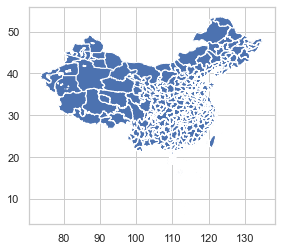

In [64]:
map.plot()

In [65]:
map[map.市=='宁波市']

,省代码,省,市代码,市,类型,geometry
88,330000,浙江省,330200,宁波市,副省级市,"MULTIPOLYGON (((122.23634 28.85761, 122.23443 ..."


## 1.7 joining map and inventor

In [66]:
# Read in addcode inventor data
China_groupby_addcode = pd.read_csv('data/clean/China_groupby_addcode.csv')
China_groupby_addcode.head()

,point,city,市,city_code,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"(75.7958, 38.2029)",Kezilesukeerkezi,克孜勒苏柯尔克孜自治州,653000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(75.99, 39.4666)",Kashi,喀什地区,653100,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"(79.9123, 31.3061)",Ali,阿里地区,542500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(80.9354, 42.8309)",Yili,伊犁哈萨克自治州,654000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,"(81.2748, 43.9052)",Yili,伊犁哈萨克自治州,654000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
China_groupby_addcode[China_groupby_addcode.city_code==310000]

,point,city,市,city_code,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1283,"(121.168, 31.2715)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1289,"(121.211, 31.0296)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2,1,0
1290,"(121.218, 31.3641)",Shanghai,上海市,310000,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1293,"(121.246, 31.3839)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,3,0,0,0,0,0,1,0,0
1297,"(121.267, 31.1205)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1298,"(121.268, 31.1748)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1300,"(121.28, 30.8166)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
1304,"(121.325, 31.1342)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,"(121.334, 31.1518)",Shanghai,上海市,310000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1309,"(121.377, 31.1148)",Shanghai,上海市,310000,0,0,0,0,1,0,...,2,1,2,1,2,3,1,1,3,2


In [68]:
China_groupby_addcode = China_groupby_addcode.groupby(["city_code"])['2001','2002','2003','2004',
                                                                     '2005','2006','2007','2008',
                                                                     '2009','2010','2011','2012',
                                                                     '2013','2014','2015','2016',
                                                                     '2017','2018','2019','2020',
                                                                     '2021'].apply(lambda g: g.sum()).reset_index().set_index('city_code')
China_groupby_addcode.head()

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_54506/1408247344.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  China_groupby_addcode = China_groupby_addcode.groupby(["city_code"])['2001','2002','2003','2004',


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
city_code,,,,,,,,,,,,,,,,,,,,,
110000,84,208,169,275,227,415,418,632,738,1208,...,2005,2463,3030,3812,5080,6256,5892,7810,8730,10247
120000,18,16,9,26,7,13,12,38,41,69,...,84,128,166,270,191,223,253,313,357,338
130100,3,3,0,3,1,7,4,3,10,13,...,5,19,24,29,56,48,47,81,73,75
130200,0,0,0,0,0,0,0,0,1,3,...,0,3,4,1,7,7,0,17,10,20
130300,0,0,0,0,0,5,0,0,0,0,...,0,1,2,5,27,50,64,112,130,152


In [69]:
China_groupby_addcode.loc['310000':'310000']

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
city_code,,,,,,,,,,,,,,,,,,,,,
310000,67,76,95,124,166,228,295,481,644,944,...,1534,1958,2448,2905,3519,4099,3722,5113,5582,4514


The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [70]:
China_groupby_addcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 110000 to 820000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2001    371 non-null    int64
 1   2002    371 non-null    int64
 2   2003    371 non-null    int64
 3   2004    371 non-null    int64
 4   2005    371 non-null    int64
 5   2006    371 non-null    int64
 6   2007    371 non-null    int64
 7   2008    371 non-null    int64
 8   2009    371 non-null    int64
 9   2010    371 non-null    int64
 10  2011    371 non-null    int64
 11  2012    371 non-null    int64
 12  2013    371 non-null    int64
 13  2014    371 non-null    int64
 14  2015    371 non-null    int64
 15  2016    371 non-null    int64
 16  2017    371 non-null    int64
 17  2018    371 non-null    int64
 18  2019    371 non-null    int64
 19  2020    371 non-null    int64
 20  2021    371 non-null    int64
dtypes: int64(21)
memory usage: 71.9 KB


In [71]:
China_groupby_addcode.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,...,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.592992,2.159030,2.442049,3.204852,3.167116,5.134771,6.334232,8.778976,11.026954,15.983827,...,24.973046,31.353100,38.684636,45.393531,54.795148,66.107817,65.118598,90.358491,103.110512,106.097035
std,10.282699,16.367207,16.978007,24.463897,24.505247,39.610102,46.901350,67.903745,85.790281,129.369468,...,204.165803,242.183183,284.002551,321.444395,392.355122,461.207058,431.073132,569.736467,632.963392,655.677014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,3.000000,3.000000,6.000000,7.000000,6.500000,9.500000,10.500000,13.000000,14.000000,14.500000
max,162.000000,222.000000,260.000000,359.000000,378.000000,595.000000,734.000000,1018.000000,1313.000000,1951.000000,...,3007.000000,3418.000000,3781.000000,3822.000000,5080.000000,6256.000000,5892.000000,7810.000000,8730.000000,10247.000000


In [72]:
China_groupby_addcode.loc[ 'Row_sum' ] = China_groupby_addcode. apply ( lambda x: x. sum ())

In [73]:
China_groupby_addcode.tail()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
city_code,,,,,,,,,,,,,,,,,,,,,
659010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810000,162,222,260,359,378,595,734,1018,1313,1951,...,3007,3418,3781,3822,4226,4592,4158,5106,5592,4769
820000,0,0,1,0,2,0,0,2,1,0,...,6,14,12,24,27,38,30,35,23,20
Row_sum,591,801,906,1189,1175,1905,2350,3257,4091,5930,...,9265,11632,14352,16841,20329,24526,24159,33523,38254,39362


<AxesSubplot:>

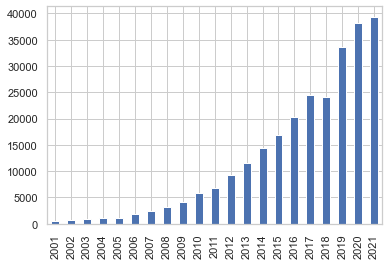

In [74]:
China_groupby_addcode.loc[ 'Row_sum' ].plot.bar()

<AxesSubplot:>

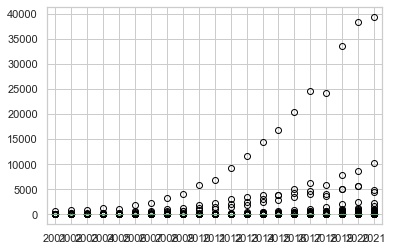

In [75]:
China_groupby_addcode.plot.box()

In [76]:
map.head()

,省代码,省,市代码,市,类型,geometry
0,110000,北京市,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,130100,石家庄市,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
3,130000,河北省,130200,唐山市,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
4,130000,河北省,130300,秦皇岛市,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


In [77]:
China_inventor_final = pd.merge(China_groupby_addcode, map.set_index('市代码'),
                                  left_index=True,
                                  right_index=True,
                                  how='left')

In [78]:
China_inventor_final.drop(columns=['省代码','省','市','类型'], inplace=True)
China_inventor_final.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry
city_code,,,,,,,,,,,,,,,,,,,,,
110000,84,208,169,275,227,415,418,632,738,1208,...,2463,3030,3812,5080,6256,5892,7810,8730,10247,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
120000,18,16,9,26,7,13,12,38,41,69,...,128,166,270,191,223,253,313,357,338,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
130100,3,3,0,3,1,7,4,3,10,13,...,19,24,29,56,48,47,81,73,75,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
130200,0,0,0,0,0,0,0,0,1,3,...,3,4,1,7,7,0,17,10,20,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
130300,0,0,0,0,0,5,0,0,0,0,...,1,2,5,27,50,64,112,130,152,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


## 1.8 plot

In [79]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os

from matplotlib.colors import ListedColormap

import sklearn
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
#from esda.adbscan import ADBSCAN

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

#import contextily as cx
# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [80]:
from geopandas import GeoDataFrame

China_inventor_final = GeoDataFrame(China_inventor_final)

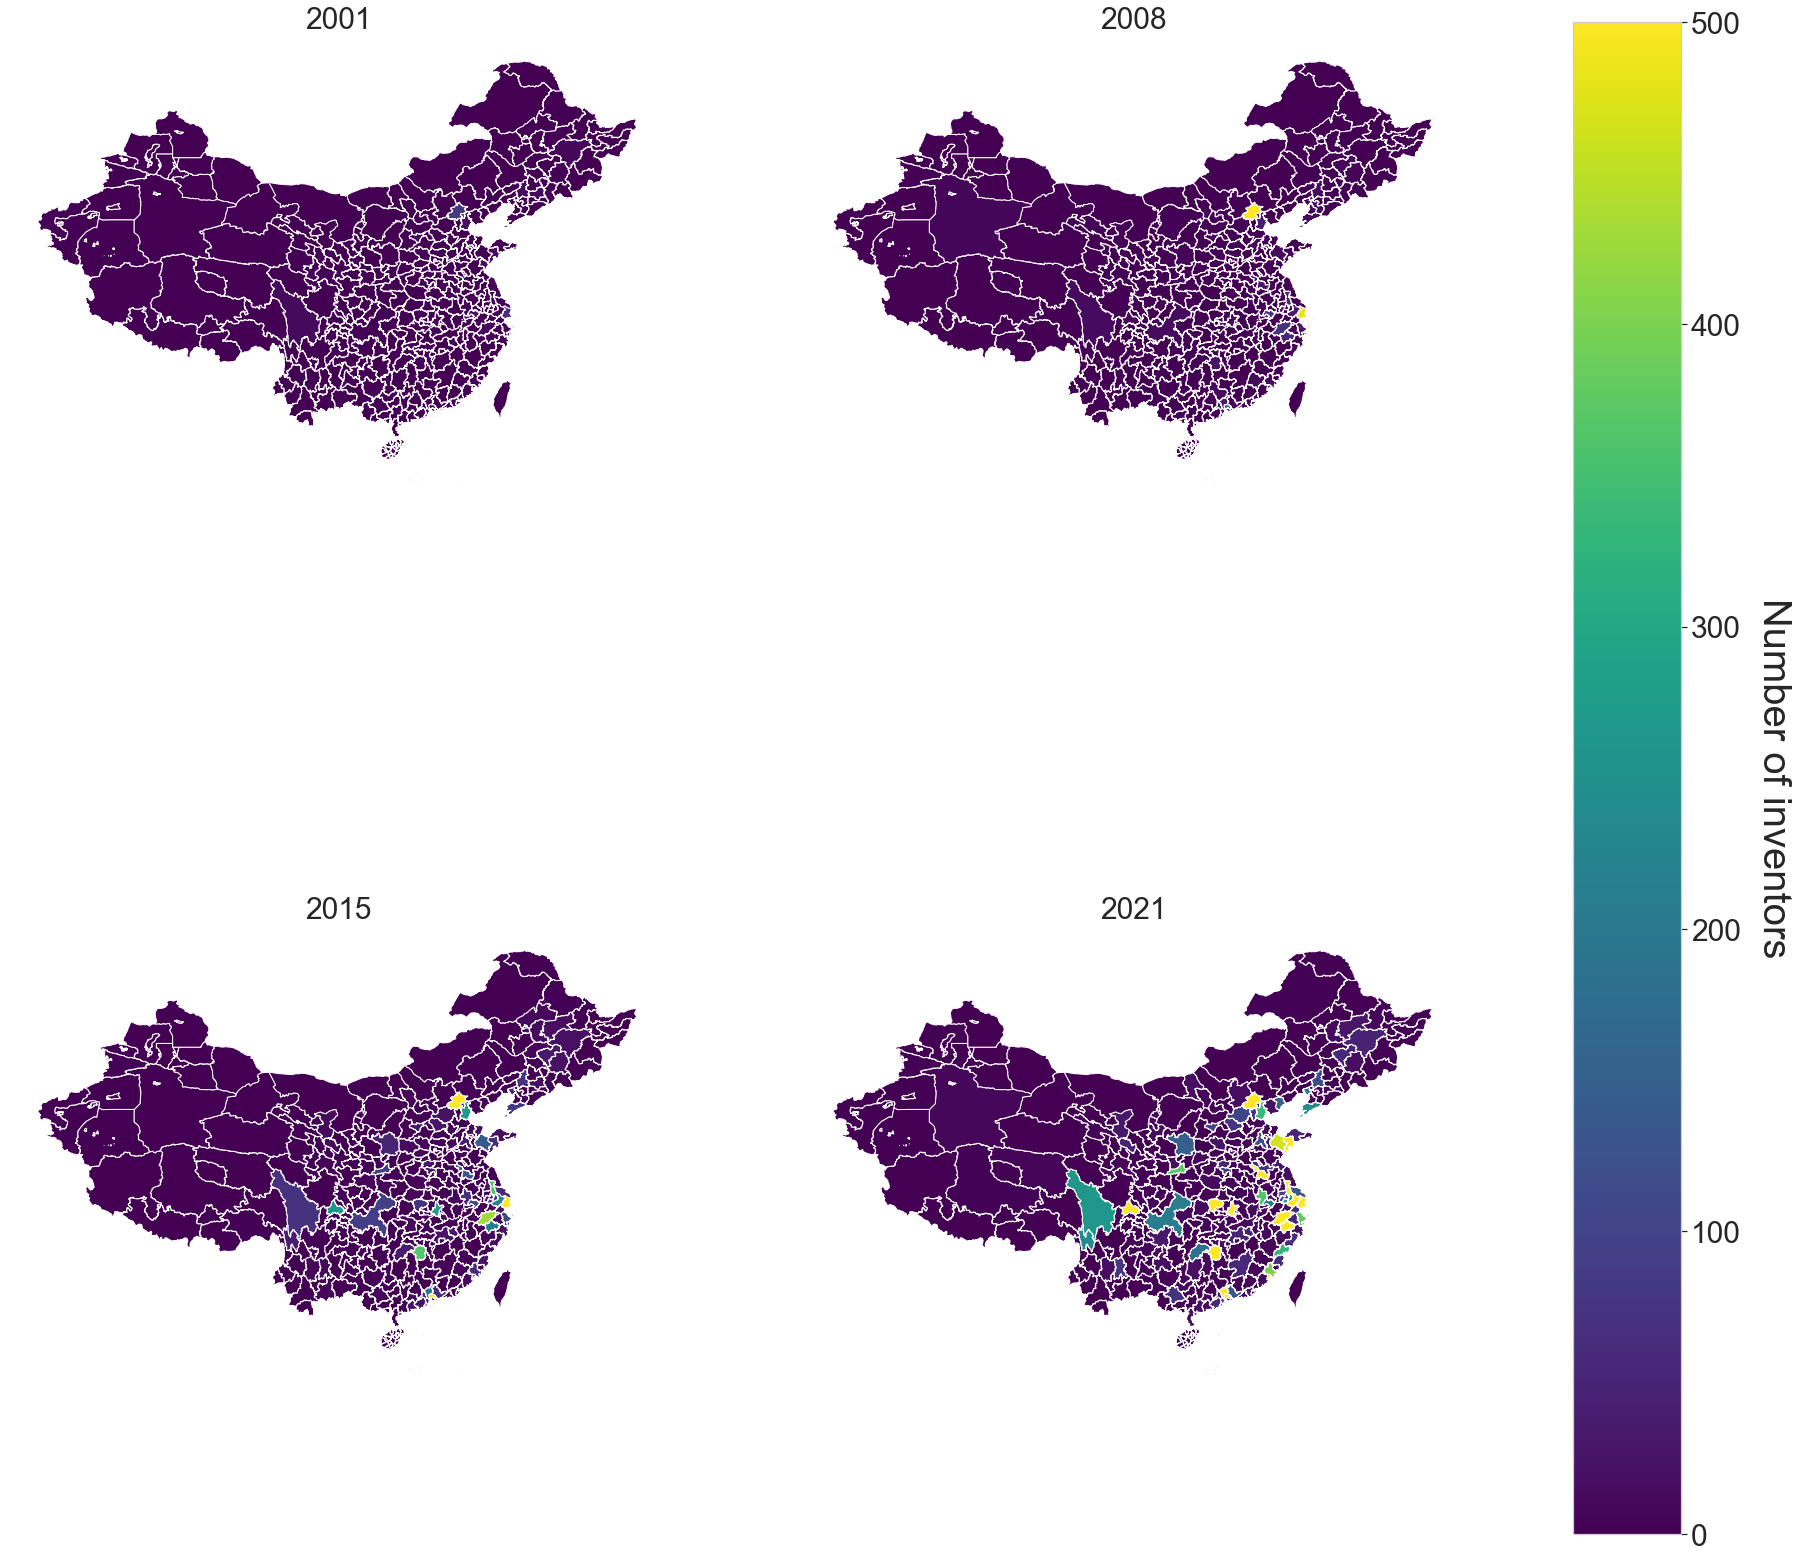

In [83]:

# use this to extract the columns that we do want to plot
to_plot = ['2001','2008','2015','2021']

# create a subplot axis, given that we have 4 different years this has to be a 2 by 2 matrix of plots
fig, axis = plt.subplots(2,2, figsize = (30,30))
# flatten the axis so that we can iterate over them
axis = axis.flatten()

# creating the plot function
# use the enumerate to get the value and its index
for i, col in enumerate(to_plot):
    # set the axis as in the rows
    ax = axis[i]
    # to make it cleaner move two axis across
    if i >=4:
        ax = axis[i+1]
    # plot the map using the viridis color map
    list_plt = China_inventor_final.plot(column = col, ax=ax, cmap = "viridis", vmin =0, vmax = 500)
    # remove the axis so that it looks cleaner
    ax.set_axis_off()
    # set the plot title as the column name
    ax.set_title(col, fontsize = 30)

# adding a color bar for the overall plot
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
vmin, vmax = 0,500
# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Number of inventors")
# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
# change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
# set the label title
# https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Number of inventors", rotation = 270, fontsize= 40, labelpad = 50)

# show the results
plt.show()